***Text Analysis Pipeline***

 Text Analysis Pipeline
In this tutorial, we'll demonstrate the power of LangGraph by building a multi-step text analysis pipeline. Our use case will focus on processing a given text through three key stages:

Text Classification: We'll categorize the input text into predefined categories (e.g., News, Blog, Research, or Other).
Entity Extraction: We'll identify and extract key entities such as persons, organizations, and locations from the text.
Text Summarization: Finally, we'll generate a concise summary of the input text.

***Key Features:***
1.State Management

2.Flexible Routing

3.Persistence

4.Visualization

In [ ]:
import os
from typing import TypedDict, List
%pip install -U langgraph langsmith langchain_google_genai
from langgraph.graph import StateGraph, END
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image


***Set Up API Key***

In [ ]:
import os
from google.colab import userdata

gemini_api_key = userdata.get('GOOGLE_API_KEY')

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

llm.invoke("greet me")

AIMessage(content='Hello there!  How are you doing today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-4db4c611-7845-414f-aa78-69ae98b79d96-0', usage_metadata={'input_tokens': 3, 'output_tokens': 11, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

***Building the Text Processing Pipeline***

***Define State***

In [ ]:
class State(TypedDict):
    text: str
    classification: str
    entities: List[str]
    summary: str

***Define Node Functions(buisness logic)***

In [ ]:
def classification_node(state: State):
    ''' Classify the text into one of the categories: News, Blog, Research, or Other '''
    prompt = PromptTemplate(
        input_variables=["text"],
        template="Classify the following text into one of the categories: News, Blog, Research, or Other.\n\nText:{text}\n\nCategory:"
    )
    message = HumanMessage(content=prompt.format(text=state["text"]))
    classification = llm.invoke([message]).content.strip()
    return {"classification": classification}


def entity_extraction_node(state: State):
    ''' Extract all the entities (Person, Organization, Location) from the text '''
    prompt = PromptTemplate(
        input_variables=["text"],
        template="Extract all the entities (Person, Organization, Location) from the following text. Provide the result as a comma-separated list.\n\nText:{text}\n\nEntities:"
    )
    message = HumanMessage(content=prompt.format(text=state["text"]))
    entities = llm.invoke([message]).content.strip().split(", ")
    return {"entities": entities}


def summarization_node(state: State):
    ''' Summarize the text in one short sentence '''
    prompt = PromptTemplate(
        input_variables=["text"],
        template="Summarize the following text in one short sentence.\n\nText:{text}\n\nSummary:"
    )
    message = HumanMessage(content=prompt.format(text=state["text"]))
    summary = llm.invoke([message]).content.strip()
    return {"summary": summary}

***Create Tools and Build Workflow***

In [ ]:
workflow = StateGraph(State)

# Add nodes to the graph
workflow.add_node("classification_node", classification_node)
workflow.add_node("entity_extraction", entity_extraction_node)
workflow.add_node("summarization", summarization_node)

# Add edges to the graph
workflow.set_entry_point("classification_node") # Set the entry point of the graph
workflow.add_edge("classification_node", "entity_extraction")
workflow.add_edge("entity_extraction", "summarization")
workflow.add_edge("summarization", END)

# Compile the graph
app = workflow.compile()

***Visualizing the Workflow***

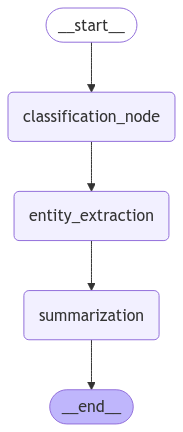

In [ ]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

***Testing the Pipeline***

In [ ]:
sample_text= """
  Electric vehicles are revolutionizing the automotive industry. With zero emissions and lower operating costs, they offer a sustainable and efficient mode of transportation.
   As technology advances, we can expect to see even more innovative features, from autonomous driving to advanced safety systems.
   The future of cars is electric, smart, and sustainable.
"""

state_input = {"text": sample_text}
result = app.invoke(state_input)

print("classification", result["classification"])
print("\n entities", result["entities"])
print("\n summary", result["summary"])

classification Blog

 entities ['There are no Person', 'Organization', 'or Location entities in the provided text.']

 summary Electric vehicles are leading a sustainable and technologically advanced revolution in the automotive industry.


In [18]:
git add origin https://github.com/rehan363/langchain_project.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-18-ddff497dc47a>, line 1)